In [1]:
from PIL import Image
import numpy as np
import cv2
import pandas as pd
from utils import plot_results

import os
from google.cloud import vision
from credentials import google_key

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = google_key
client = vision.ImageAnnotatorClient()

In [153]:
color = "pink"
image_directory = f"../images/result_snippets/{color}/"

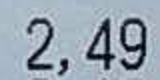

In [154]:
# load all images from given directory and apply OCR

image_snippets = []
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(image_directory, filename))
        if img is not None:
            image_snippets.append(img)

plot_results(image_snippets[0], scale=2)

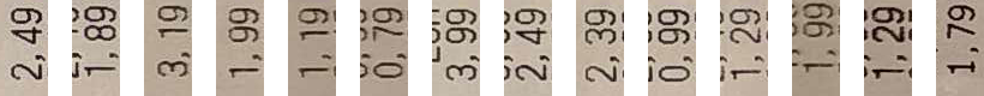

In [157]:
# TODO figure out why background color is suddenly "warmer" than before (has nothing to do with plot_results(), saved image has the same problem)

gap = 20

# Define the dimensions of the canvas (you can adjust these as needed)
max_width = np.max([Image.fromarray(te).width for te in image_snippets])
total_height = np.sum([Image.fromarray(te).height for te in image_snippets])
canvas_width = max_width
canvas_height = total_height + gap * len(image_snippets) - gap

# Create an empty canvas
canvas = Image.new('RGB', (canvas_width, canvas_height), (255, 255, 255))

x_offset = 0
y_offset = 0
for te in image_snippets:
    image = Image.fromarray(te)

    # Paste the image onto the canvas at the calculated position
    canvas.paste(image, (x_offset, y_offset))

    # Calculate the position to paste the image in the center of the canvas
    # x_offset = (x_offset - image.width)
    y_offset = (y_offset + image.height + gap)

# Save or display the final canvas
# canvas.save('output_canvas.png')
plot_results(canvas.rotate(90, expand=True), scale=1.2, mode='popup')

canvas_array = np.array(canvas)

In [135]:
_, image_bytes = cv2.imencode('.png', canvas_array)
image_data = image_bytes.tobytes()
google_image = vision.Image(content=image_data)
response = client.text_detection(image=google_image)
texts = response.text_annotations

In [136]:
text = texts[0].description
print(text)

2, 19
3.99
3,59
2,95
0,65
2,29
2,69
4,38
2,98
1,76
1,39
11,94
3,49
3,49
2,99
2,99
2,39
1,15
1,29
0,95
2,95
2,15
2,39
0,35
0,87
3,98
2,99
2,39
2,20
2,45
2,45
1,99
3.49
2,19
3,99
2,69
1,79
2,99
1,39
2,98
1,99
0,86
1,42
0,99
0,99
0,99
2,59
2,49
2,58
1,99
2,78
1,09
9,95
1,98
3,99
0,39
0,59
1,99
2,99
3,98
0,99
3,59
0,99
2,22
2,19
2,70
2,19
2,58
0,95
2,25
2,25
0,99
1,98
1,78
0,88
2,78
7,96
2,45
2,45
6,99
2,69
1,99
3,55
2,69
1,79
1,49
1,19
1,49
1,90
1,78
4,99
4,79
2,99
1,99
1,79
2,99
1,99
0,85
2,98
0,55
2,19
4,39
1.79
1,79
3,59
2,45
2,45
1,79
3,49
1,39
4.77
3,49
1,39
3,98
3,49
3,49
1,60
1,99
5,00
2,50
2,50
2,45
0,49
0,65
0,49
0,59
1,99
0,99
2,58
2,98
2,99
6,73
0,85
2, 19
3,49
3,99
2,98
11,92
3,59
1,99
1,99
0,19
0,78
2,95
3,45
1,99
1,99
1,89
1,99
2,99
1,49
1,15
7,45
3,49
1,99
2,22
2,99
5,50
5,30
2,29
1,99
2,45
3,99
1,99
2,15
3,45
2,95
4,98
0,89
1,15
3,98
2,79
4,58
0,99
2,95
2,19
2,29
2,69
7,10
2,39
3,29
2,98
1,69
2,19
1,49
1,90
1,59
0,99
2,59
2,99
1,95
2,19
3,49
2,19
3,99
1.11
1,49
1,19
2,22
2

In [137]:
text = text.replace(",", "_")
text = text.replace(".", "_")
text = text.replace(" ", "")
text = text.split("\n")
# drop value if no . is present
text = [t for t in text if "_" in t]
# check if text contains any numbers
text = [t for t in text if any(char.isdigit() for char in t)]
text

['2_19',
 '3_99',
 '3_59',
 '2_95',
 '0_65',
 '2_29',
 '2_69',
 '4_38',
 '2_98',
 '1_76',
 '1_39',
 '11_94',
 '3_49',
 '3_49',
 '2_99',
 '2_99',
 '2_39',
 '1_15',
 '1_29',
 '0_95',
 '2_95',
 '2_15',
 '2_39',
 '0_35',
 '0_87',
 '3_98',
 '2_99',
 '2_39',
 '2_20',
 '2_45',
 '2_45',
 '1_99',
 '3_49',
 '2_19',
 '3_99',
 '2_69',
 '1_79',
 '2_99',
 '1_39',
 '2_98',
 '1_99',
 '0_86',
 '1_42',
 '0_99',
 '0_99',
 '0_99',
 '2_59',
 '2_49',
 '2_58',
 '1_99',
 '2_78',
 '1_09',
 '9_95',
 '1_98',
 '3_99',
 '0_39',
 '0_59',
 '1_99',
 '2_99',
 '3_98',
 '0_99',
 '3_59',
 '0_99',
 '2_22',
 '2_19',
 '2_70',
 '2_19',
 '2_58',
 '0_95',
 '2_25',
 '2_25',
 '0_99',
 '1_98',
 '1_78',
 '0_88',
 '2_78',
 '7_96',
 '2_45',
 '2_45',
 '6_99',
 '2_69',
 '1_99',
 '3_55',
 '2_69',
 '1_79',
 '1_49',
 '1_19',
 '1_49',
 '1_90',
 '1_78',
 '4_99',
 '4_79',
 '2_99',
 '1_99',
 '1_79',
 '2_99',
 '1_99',
 '0_85',
 '2_98',
 '0_55',
 '2_19',
 '4_39',
 '1_79',
 '1_79',
 '3_59',
 '2_45',
 '2_45',
 '1_79',
 '3_49',
 '1_39',
 '4_77',


In [142]:
print(len(image_snippets), len(text))
assert len(text) == len(image_snippets)

343 343


## SAVE VALUES

In [143]:
# save image snippets as .png files
for i, img in enumerate(image_snippets[:len(text)]):
    # prevent duplicate filenames
    if 0 <= i < 10:
        cv2.imwrite(f"../images/classified_snippets/{color}/00{i}-{text[i]}.png", img)
    if 10 <= i < 100:
        cv2.imwrite(f"../images/classified_snippets/{color}/0{i}-{text[i]}.png", img)
    if 100 <= i < 1000:
        cv2.imwrite(f"../images/classified_snippets/{color}/{i}-{text[i]}.png", img)

## LOAD VALUES

In [144]:
# get file names from folder
values = os.listdir(f"../images/classified_snippets/{color}/")
values = [f.split("-")[1] for f in values]
values = [f[:-4] for f in values]
values = [float(f.replace("_", ".")) for f in values]
values

[2.19,
 3.99,
 3.59,
 2.95,
 0.65,
 2.29,
 2.69,
 4.38,
 2.98,
 1.76,
 1.39,
 11.94,
 3.49,
 3.49,
 2.99,
 2.99,
 2.39,
 1.15,
 1.29,
 0.95,
 2.95,
 2.15,
 2.39,
 0.35,
 0.87,
 3.98,
 2.99,
 2.39,
 2.2,
 2.45,
 2.45,
 1.99,
 3.49,
 2.19,
 3.99,
 2.69,
 1.79,
 2.99,
 1.39,
 2.98,
 1.99,
 0.86,
 1.42,
 0.99,
 0.99,
 0.99,
 2.59,
 2.49,
 2.58,
 1.99,
 2.78,
 1.09,
 9.95,
 1.98,
 3.99,
 0.39,
 0.59,
 1.99,
 2.99,
 3.98,
 0.99,
 3.59,
 0.99,
 2.22,
 2.19,
 2.7,
 2.19,
 2.58,
 0.95,
 2.25,
 2.25,
 0.99,
 1.98,
 1.78,
 0.88,
 2.78,
 7.96,
 2.45,
 2.45,
 6.99,
 2.69,
 1.99,
 3.55,
 2.69,
 1.79,
 1.49,
 1.19,
 1.49,
 1.9,
 1.78,
 4.99,
 4.79,
 2.99,
 1.99,
 1.79,
 2.99,
 1.99,
 0.85,
 2.98,
 0.55,
 2.19,
 4.39,
 1.79,
 1.79,
 3.59,
 2.45,
 2.45,
 1.79,
 3.49,
 1.39,
 4.77,
 3.49,
 1.39,
 3.98,
 3.49,
 3.49,
 1.6,
 1.99,
 5.0,
 2.5,
 2.5,
 2.45,
 0.49,
 0.65,
 0.49,
 0.59,
 1.99,
 0.99,
 2.58,
 2.98,
 2.99,
 6.73,
 0.85,
 2.19,
 3.49,
 3.99,
 2.98,
 11.92,
 3.59,
 1.99,
 1.99,
 0.19,
 0.78,
 2.9

In [158]:
common = os.listdir(f"../images/classified_snippets/orange/")
tim = os.listdir(f"../images/classified_snippets/pink/")
def get_vals(vals):
    vals = [f.split("-")[1] for f in vals]
    vals = [f[:-4] for f in vals]
    vals = [float(f.replace("_", ".")) for f in vals]
    return vals


print(sum(get_vals(common))/2, sum(get_vals(tim)))

171.0900000000001 27.759999999999994
